In [1]:
from pathlib import Path
import re
import random
import warnings

import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
ROOT = Path("../../data/downloads/segmentation/brain_mri/")

In [3]:
folders = []
csvs = []
mds = []


In [4]:
for item in ROOT.iterdir():
    if item.is_dir():
        print(f"Folder: {item.name}")
        folders.append(item.name)
    elif item.suffix.lower() == ".csv":
        print(f"CSV: {item.name}")
        csvs.append(item.name)
    elif item.suffix.lower() == ".md":
        print(f"MD: {item.name}")
        mds.append(item.name)

CSV: data.csv
MD: README.md
Folder: TCGA_CS_4941_19960909
Folder: TCGA_CS_4942_19970222
Folder: TCGA_CS_4943_20000902
Folder: TCGA_CS_4944_20010208
Folder: TCGA_CS_5393_19990606
Folder: TCGA_CS_5395_19981004
Folder: TCGA_CS_5396_20010302
Folder: TCGA_CS_5397_20010315
Folder: TCGA_CS_6186_20000601
Folder: TCGA_CS_6188_20010812
Folder: TCGA_CS_6290_20000917
Folder: TCGA_CS_6665_20010817
Folder: TCGA_CS_6666_20011109
Folder: TCGA_CS_6667_20011105
Folder: TCGA_CS_6668_20011025
Folder: TCGA_CS_6669_20020102
Folder: TCGA_DU_5849_19950405
Folder: TCGA_DU_5851_19950428
Folder: TCGA_DU_5852_19950709
Folder: TCGA_DU_5853_19950823
Folder: TCGA_DU_5854_19951104
Folder: TCGA_DU_5855_19951217
Folder: TCGA_DU_5871_19941206
Folder: TCGA_DU_5872_19950223
Folder: TCGA_DU_5874_19950510
Folder: TCGA_DU_6399_19830416
Folder: TCGA_DU_6400_19830518
Folder: TCGA_DU_6401_19831001
Folder: TCGA_DU_6404_19850629
Folder: TCGA_DU_6405_19851005
Folder: TCGA_DU_6407_19860514
Folder: TCGA_DU_6408_19860521
Folder: TCGA

In [5]:
print("\nSummary:")
print(f"Total Folders: {len(folders)}")
print(f"Total CSV files: {len(csvs)}")
print(f"Total MD files: {len(mds)}")


Summary:
Total Folders: 110
Total CSV files: 1
Total MD files: 1


In [6]:
for folder in [f for f in ROOT.iterdir() if f.is_dir()]:
    tifs = list(folder.glob("*.tif"))
    images = {f.stem for f in tifs if not f.stem.endswith("_mask")}
    masks  = {f.stem.replace("_mask", "") for f in tifs if f.stem.endswith("_mask")}
    
    # Find missing
    missing_images = masks - images   # masks with no image
    missing_masks  = images - masks   # images with no mask
    
    total_missing = len(missing_images) + len(missing_masks)
    
    if total_missing == 0:
        print(f"{folder.name} = All good")
    else:
        print(f"{folder.name} = {total_missing} have no pair")

TCGA_CS_4941_19960909 = All good
TCGA_CS_4942_19970222 = All good
TCGA_CS_4943_20000902 = All good
TCGA_CS_4944_20010208 = All good
TCGA_CS_5393_19990606 = All good
TCGA_CS_5395_19981004 = All good
TCGA_CS_5396_20010302 = All good
TCGA_CS_5397_20010315 = All good
TCGA_CS_6186_20000601 = All good
TCGA_CS_6188_20010812 = All good
TCGA_CS_6290_20000917 = All good
TCGA_CS_6665_20010817 = All good
TCGA_CS_6666_20011109 = All good
TCGA_CS_6667_20011105 = All good
TCGA_CS_6668_20011025 = All good
TCGA_CS_6669_20020102 = All good
TCGA_DU_5849_19950405 = All good
TCGA_DU_5851_19950428 = All good
TCGA_DU_5852_19950709 = All good
TCGA_DU_5853_19950823 = All good
TCGA_DU_5854_19951104 = All good
TCGA_DU_5855_19951217 = All good
TCGA_DU_5871_19941206 = All good
TCGA_DU_5872_19950223 = All good
TCGA_DU_5874_19950510 = All good
TCGA_DU_6399_19830416 = All good
TCGA_DU_6400_19830518 = All good
TCGA_DU_6401_19831001 = All good
TCGA_DU_6404_19850629 = All good
TCGA_DU_6405_19851005 = All good
TCGA_DU_64

In [15]:
import random
import mplcyberpunk


In [16]:
patient_folders = [f for f in ROOT.iterdir() if f.is_dir()]

In [17]:
sampled_folders = random.sample(patient_folders, 6)

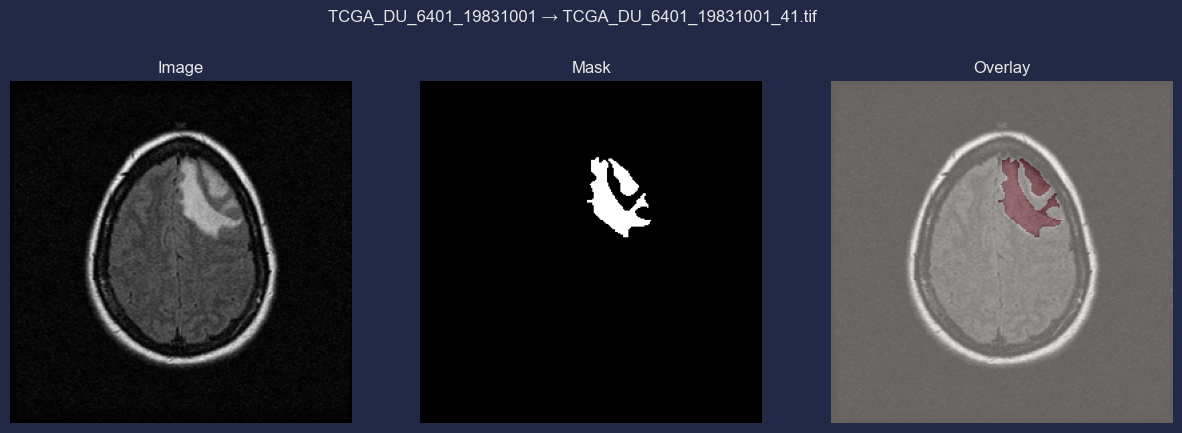

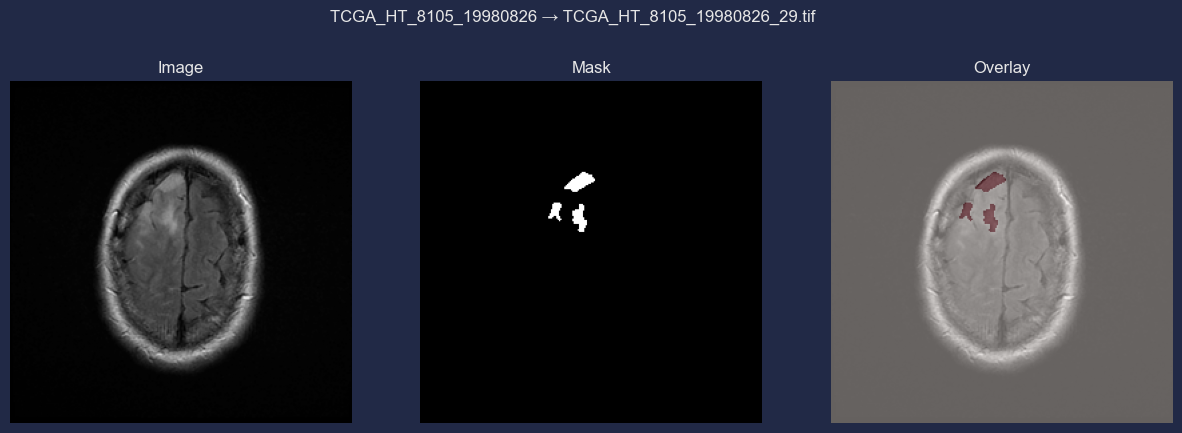

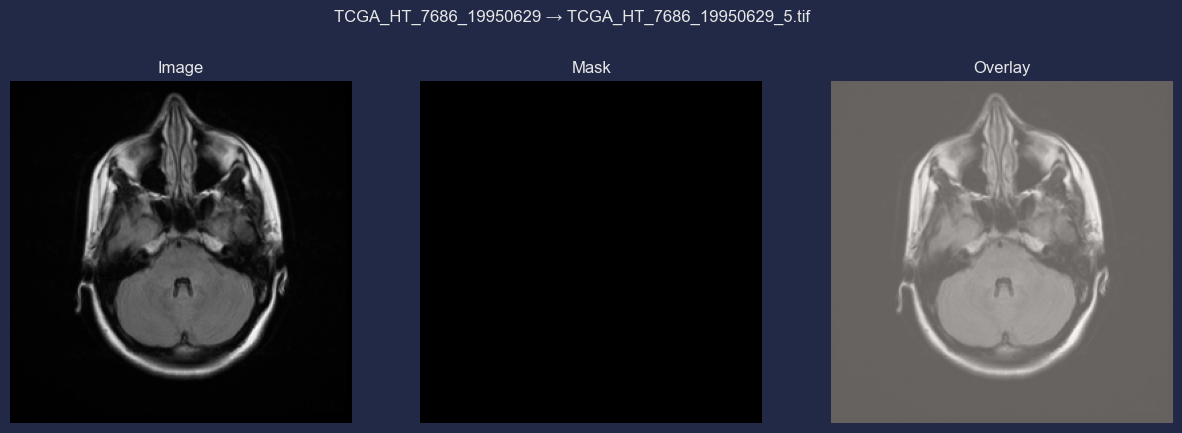

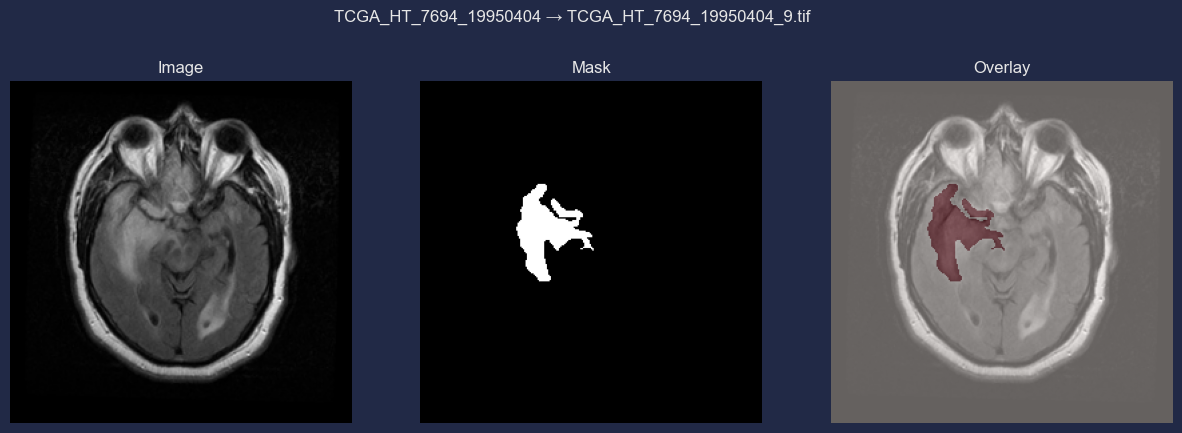

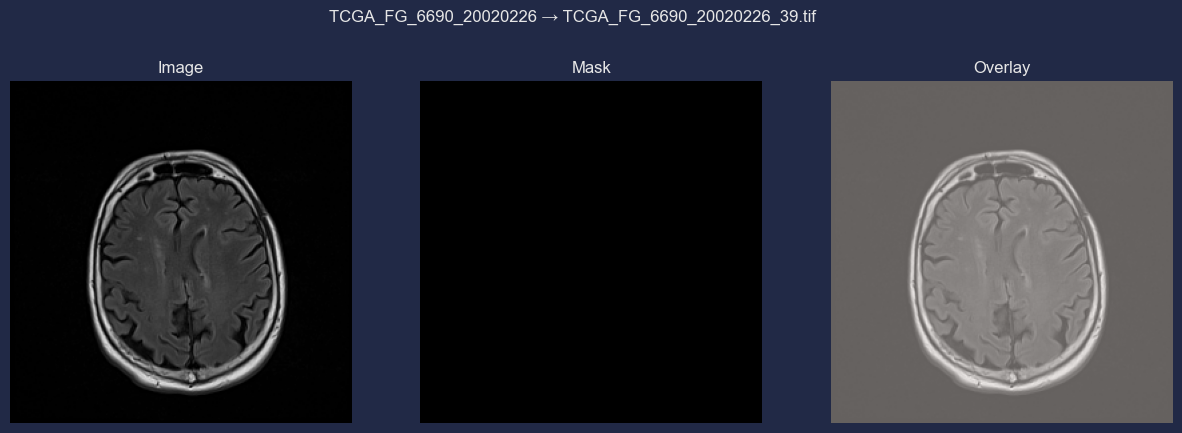

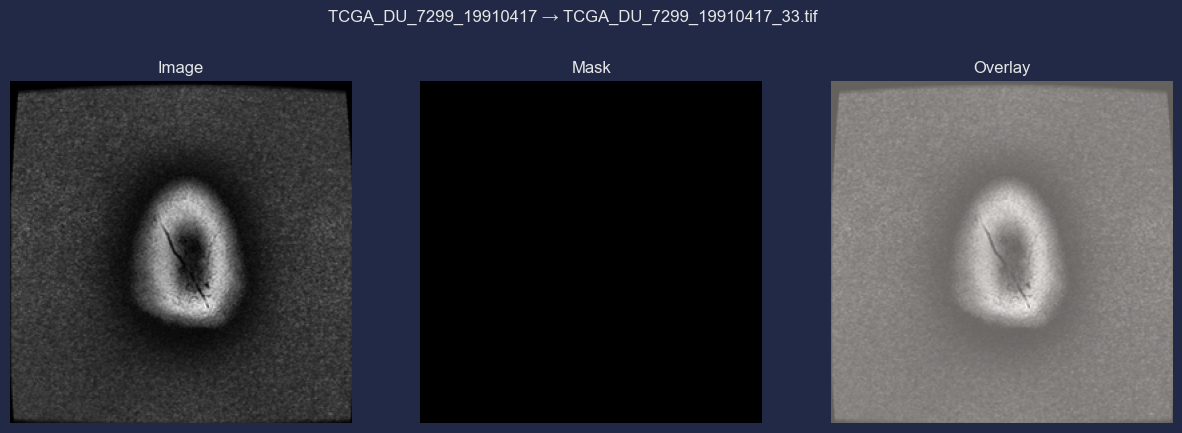

In [18]:
for folder in sampled_folders:
    images = [f for f in folder.glob("*.tif") if not f.stem.endswith("_mask")]
    if not images:
        continue
    
    img_path = random.choice(images)
    mask_path = folder / f"{img_path.stem}_mask.tif"
    
    if not mask_path.exists():
        continue
    
    img = np.array(Image.open(img_path))
    msk = np.array(Image.open(mask_path))
    
    if img.ndim == 3:
        base = img[..., img.shape[2] // 2] 
    else:
        base = img
    
    
    plt.style.use("cyberpunk")
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    axs[0].imshow(base, cmap="gray")
    axs[0].set_title("Image")
    axs[0].axis("off")
    
    axs[1].imshow(msk, cmap="gray")
    axs[1].set_title("Mask")
    axs[1].axis("off")
    
    axs[2].imshow(base, cmap="gray")
    axs[2].imshow(msk, cmap="Reds", alpha=0.4)
    axs[2].set_title("Overlay")
    axs[2].axis("off")
    
    plt.suptitle(f"{folder.name} → {img_path.name}", fontsize=12)
    
    mplcyberpunk.add_glow_effects()
    
    plt.show()

In [19]:
csv_path = ROOT / "data.csv"
df_meta = pd.read_csv(csv_path)

In [21]:
print("Shape:", df_meta.shape)
df_meta.head()


Shape: (110, 18)


,Patient,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,tumor_tissue_site,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
0,TCGA_CS_4941,2.0,4.0,2,2.0,NaN,3.0,2,1.0,2.0,1.0,3.0,2.0,2.0,67.0,3.0,2.0,1.0
1,TCGA_CS_4942,1.0,5.0,2,1.0,1.0,2.0,1,1.0,2.0,1.0,3.0,2.0,1.0,44.0,2.0,NaN,1.0
2,TCGA_CS_4943,1.0,5.0,2,1.0,2.0,2.0,1,1.0,2.0,1.0,1.0,2.0,2.0,37.0,3.0,NaN,0.0
3,TCGA_CS_4944,NaN,5.0,2,1.0,2.0,1.0,1,1.0,1.0,1.0,3.0,6.0,2.0,50.0,3.0,NaN,0.0
4,TCGA_CS_5393,4.0,5.0,2,1.0,2.0,3.0,1,1.0,2.0,1.0,1.0,6.0,2.0,39.0,3.0,NaN,0.0


In [22]:
print("\nMissing values per column:")
print(df_meta.isna().sum())


Missing values per column:
Patient                       0
RNASeqCluster                18
MethylationCluster            1
miRNACluster                  0
CNCluster                     2
RPPACluster                  12
OncosignCluster               5
COCCluster                    0
histological_type             1
neoplasm_histologic_grade     1
tumor_tissue_site             1
laterality                    1
tumor_location                1
gender                        1
age_at_initial_pathologic     1
race                          2
ethnicity                     8
death01                       1
dtype: int64


In [23]:
incomplete_rows = df_meta[df_meta.isna().any(axis=1)]
print(f"\nTotal incomplete rows: {len(incomplete_rows)}")


Total incomplete rows: 32


- Patient → Patient ID (TCGA_<site>_<id>).

- RNASeqCluster → Cluster assignment based on RNA sequencing (gene expression profiles). Groups tumors by transcriptomic similarity.

- MethylationCluster → Cluster assignment based on DNA methylation (epigenetic changes).

- miRNACluster → Cluster assignment based on microRNA expression profiles.

- CNCluster → Copy Number alteration cluster (genomic amplifications/deletions).

- RPPACluster → Cluster from Reverse Phase Protein Array (protein expression).

- OncosignCluster → Oncosign clustering (integrates oncogenic pathway signatures).

- COCCluster → Cluster of Clusters (consensus clustering across multiple data types).

- histological_type → Tumor histology (1=astrocytoma, 2=oligodendroglioma, 3=oligoastrocytoma, etc. depending on coding).

- neoplasm_histologic_grade → WHO tumor grade (II = low grade, III = anaplastic).

- tumor_tissue_site → Location (e.g., brain, frontal lobe, parietal lobe).

- laterality → Which side of brain (1=Left, 2=Right).

- tumor_location → More detailed location code.

- gender → Encoded as 1=Male, 2=Female (TCGA standard).

- age_at_initial_pathologic → Age at diagnosis.

- race → Patient race (coded numerically).

- ethnicity → Ethnicity (coded numerically).

- death01 → Survival outcome (0=Alive, 1=Deceased).

In [24]:
def impute_from_similar(df, target_col, helper_cols):
    """
    For each missing value in target_col, find patients with the same values
    in helper_cols and fill with the most common target_col among them.
    """
    df_new = df.copy()
    
    for idx, row in df[df[target_col].isna()].iterrows():
        # get patient row
        query = {}
        for col in helper_cols:
            if pd.notna(row[col]):
                query[col] = row[col]
        
        # find similar patients
        mask = pd.Series(True, index=df.index)
        for col, val in query.items():
            mask &= (df[col] == val)
        
        candidates = df.loc[mask & df[target_col].notna(), target_col]
        
        if len(candidates) > 0:
            # assign most frequent value
            filled_val = candidates.mode()[0]
            df_new.at[idx, target_col] = filled_val
            print(f"Filled {target_col} for patient {row['Patient']} → {filled_val} (based on {query})")
        else:
            print(f"⚠️ Could not fill {target_col} for patient {row['Patient']} (no similar cases found)")
    
    return df_new

In [25]:
df_meta_filled = impute_from_similar(
    df_meta,
    target_col="RPPACluster",
    helper_cols=["RNASeqCluster", "miRNACluster", "MethylationCluster", "CNCluster"]
)

Filled RPPACluster for patient TCGA_CS_4941 → 3.0 (based on {'RNASeqCluster': 2.0, 'miRNACluster': 2, 'MethylationCluster': 4.0, 'CNCluster': 2.0})
Filled RPPACluster for patient TCGA_CS_5395 → 3.0 (based on {'RNASeqCluster': 2.0, 'miRNACluster': 2, 'MethylationCluster': 4.0, 'CNCluster': 2.0})
Filled RPPACluster for patient TCGA_CS_6290 → 2.0 (based on {'RNASeqCluster': 1.0, 'miRNACluster': 2, 'MethylationCluster': 5.0, 'CNCluster': 1.0})
Filled RPPACluster for patient TCGA_CS_6667 → 2.0 (based on {'RNASeqCluster': 1.0, 'miRNACluster': 1, 'MethylationCluster': 3.0, 'CNCluster': 1.0})
Filled RPPACluster for patient TCGA_DU_7299 → 2.0 (based on {'miRNACluster': 4, 'MethylationCluster': 3.0, 'CNCluster': 1.0})
Filled RPPACluster for patient TCGA_FG_6692 → 2.0 (based on {'RNASeqCluster': 2.0, 'miRNACluster': 4, 'MethylationCluster': 4.0, 'CNCluster': 2.0})
Filled RPPACluster for patient TCGA_FG_A60K → 2.0 (based on {'miRNACluster': 2, 'MethylationCluster': 3.0, 'CNCluster': 3.0})
Filled R

In [26]:
print("\nMissing values per column:")
print(df_meta_filled.isna().sum())


Missing values per column:
Patient                       0
RNASeqCluster                18
MethylationCluster            1
miRNACluster                  0
CNCluster                     2
RPPACluster                   0
OncosignCluster               5
COCCluster                    0
histological_type             1
neoplasm_histologic_grade     1
tumor_tissue_site             1
laterality                    1
tumor_location                1
gender                        1
age_at_initial_pathologic     1
race                          2
ethnicity                     8
death01                       1
dtype: int64


In [27]:
# Impute RNASeqCluster using other clusters
df_meta_filled = impute_from_similar(
    df_meta_filled,
    target_col="RNASeqCluster",
    helper_cols=["MethylationCluster", "miRNACluster", "CNCluster", "RPPACluster", "OncosignCluster"]
)

⚠️ Could not fill RNASeqCluster for patient TCGA_CS_4944 (no similar cases found)
Filled RNASeqCluster for patient TCGA_CS_5397 → 2.0 (based on {'MethylationCluster': 4.0, 'miRNACluster': 1, 'CNCluster': 2.0, 'RPPACluster': 3.0, 'OncosignCluster': 3.0})
Filled RNASeqCluster for patient TCGA_CS_6666 → 1.0 (based on {'MethylationCluster': 5.0, 'miRNACluster': 2, 'CNCluster': 1.0, 'RPPACluster': 3.0, 'OncosignCluster': 2.0})
⚠️ Could not fill RNASeqCluster for patient TCGA_DU_5872 (no similar cases found)
Filled RNASeqCluster for patient TCGA_DU_6408 → 1.0 (based on {'MethylationCluster': 5.0, 'miRNACluster': 2, 'CNCluster': 1.0, 'RPPACluster': 2.0, 'OncosignCluster': 2.0})
Filled RNASeqCluster for patient TCGA_DU_7019 → 1.0 (based on {'MethylationCluster': 3.0, 'miRNACluster': 2, 'CNCluster': 1.0, 'RPPACluster': 2.0, 'OncosignCluster': 2.0})
Filled RNASeqCluster for patient TCGA_DU_7299 → 2.0 (based on {'MethylationCluster': 3.0, 'miRNACluster': 4, 'CNCluster': 1.0, 'RPPACluster': 2.0, '

In [28]:
print("\nMissing values per column:")
print(df_meta_filled.isna().sum())


Missing values per column:
Patient                      0
RNASeqCluster                4
MethylationCluster           1
miRNACluster                 0
CNCluster                    2
RPPACluster                  0
OncosignCluster              5
COCCluster                   0
histological_type            1
neoplasm_histologic_grade    1
tumor_tissue_site            1
laterality                   1
tumor_location               1
gender                       1
age_at_initial_pathologic    1
race                         2
ethnicity                    8
death01                      1
dtype: int64


In [29]:
df_meta_filled = impute_from_similar(
    df_meta_filled,
    target_col="gender",
    helper_cols=["histological_type", "tumor_location"]
)

Filled gender for patient TCGA_HT_A61B → 1.0 (based on {})


In [30]:
df_meta_filled = impute_from_similar(
    df_meta_filled,
    target_col="ethnicity",
    helper_cols=["race", "RNASeqCluster", "MethylationCluster"]
)

df_meta_filled = impute_from_similar(
    df_meta_filled,
    target_col="race",
    helper_cols=["ethnicity", "RNASeqCluster", "MethylationCluster"]
)

Filled ethnicity for patient TCGA_CS_4942 → 2.0 (based on {'race': 2.0, 'RNASeqCluster': 1.0, 'MethylationCluster': 5.0})
Filled ethnicity for patient TCGA_CS_4943 → 2.0 (based on {'race': 3.0, 'RNASeqCluster': 1.0, 'MethylationCluster': 5.0})
Filled ethnicity for patient TCGA_CS_4944 → 2.0 (based on {'race': 3.0, 'MethylationCluster': 5.0})
Filled ethnicity for patient TCGA_CS_5393 → 2.0 (based on {'race': 3.0, 'RNASeqCluster': 4.0, 'MethylationCluster': 5.0})
Filled ethnicity for patient TCGA_CS_5395 → 2.0 (based on {'race': 2.0, 'RNASeqCluster': 2.0, 'MethylationCluster': 4.0})
Filled ethnicity for patient TCGA_CS_6290 → 2.0 (based on {'RNASeqCluster': 1.0, 'MethylationCluster': 5.0})
Filled ethnicity for patient TCGA_CS_6669 → 2.0 (based on {'race': 3.0, 'RNASeqCluster': 4.0, 'MethylationCluster': 1.0})
Filled ethnicity for patient TCGA_HT_A61B → 2.0 (based on {'RNASeqCluster': 1.0, 'MethylationCluster': 5.0})
Filled race for patient TCGA_CS_6290 → 3.0 (based on {'ethnicity': 2.0, 

In [31]:
print("\nMissing values per column:")
print(df_meta_filled.isna().sum())


Missing values per column:
Patient                      0
RNASeqCluster                4
MethylationCluster           1
miRNACluster                 0
CNCluster                    2
RPPACluster                  0
OncosignCluster              5
COCCluster                   0
histological_type            1
neoplasm_histologic_grade    1
tumor_tissue_site            1
laterality                   1
tumor_location               1
gender                       0
age_at_initial_pathologic    1
race                         0
ethnicity                    0
death01                      1
dtype: int64


In [33]:
df_meta_filled = impute_from_similar(
    df_meta_filled,
    target_col="tumor_location",
    helper_cols=["tumor_tissue_site", "laterality"]
)

Filled tumor_location for patient TCGA_HT_A61B → 2.0 (based on {})


In [34]:
print("\nMissing values per column:")
print(df_meta_filled.isna().sum())


Missing values per column:
Patient                      0
RNASeqCluster                4
MethylationCluster           1
miRNACluster                 0
CNCluster                    2
RPPACluster                  0
OncosignCluster              5
COCCluster                   0
histological_type            1
neoplasm_histologic_grade    1
tumor_tissue_site            1
laterality                   1
tumor_location               0
gender                       0
age_at_initial_pathologic    1
race                         0
ethnicity                    0
death01                      1
dtype: int64


In [35]:
df_meta_filled = impute_from_similar(
    df_meta_filled,
    target_col="laterality",
    helper_cols=["tumor_location"]
)

Filled laterality for patient TCGA_HT_A61B → 3.0 (based on {'tumor_location': 2.0})


In [36]:
df_meta_filled = impute_from_similar(
    df_meta_filled,
    target_col="tumor_tissue_site",
    helper_cols=["tumor_location", "histological_type"]
)

Filled tumor_tissue_site for patient TCGA_HT_A61B → 1.0 (based on {'tumor_location': 2.0})


In [37]:
df_meta_filled = impute_from_similar(
    df_meta_filled,
    target_col="neoplasm_histologic_grade",
    helper_cols=["histological_type"]
)

Filled neoplasm_histologic_grade for patient TCGA_HT_A61B → 2.0 (based on {})


In [38]:
df_meta_filled = impute_from_similar(
    df_meta_filled,
    target_col="histological_type",
    helper_cols=["neoplasm_histologic_grade", "RNASeqCluster", "MethylationCluster"]
)

Filled histological_type for patient TCGA_HT_A61B → 1.0 (based on {'neoplasm_histologic_grade': 2.0, 'RNASeqCluster': 1.0, 'MethylationCluster': 5.0})


In [39]:
df_meta_filled = impute_from_similar(
    df_meta_filled,
    target_col="OncosignCluster",
    helper_cols=["RNASeqCluster", "MethylationCluster", "CNCluster", "RPPACluster"]
)

Filled OncosignCluster for patient TCGA_DU_7014 → 2.0 (based on {'RNASeqCluster': 1.0, 'MethylationCluster': 3.0, 'CNCluster': 1.0, 'RPPACluster': 2.0})
Filled OncosignCluster for patient TCGA_FG_5962 → 1.0 (based on {'RNASeqCluster': 4.0, 'MethylationCluster': 2.0, 'CNCluster': 3.0, 'RPPACluster': 4.0})
Filled OncosignCluster for patient TCGA_FG_5964 → 1.0 (based on {'RNASeqCluster': 3.0, 'MethylationCluster': 3.0, 'CNCluster': 3.0, 'RPPACluster': 2.0})
Filled OncosignCluster for patient TCGA_FG_7637 → 1.0 (based on {'RNASeqCluster': 3.0, 'MethylationCluster': 3.0, 'RPPACluster': 2.0})
Filled OncosignCluster for patient TCGA_HT_A61A → 2.0 (based on {'RNASeqCluster': 1.0, 'MethylationCluster': 5.0, 'RPPACluster': 2.0})


In [40]:
print("\nMissing values per column:")
print(df_meta_filled.isna().sum())


Missing values per column:
Patient                      0
RNASeqCluster                4
MethylationCluster           1
miRNACluster                 0
CNCluster                    2
RPPACluster                  0
OncosignCluster              0
COCCluster                   0
histological_type            0
neoplasm_histologic_grade    0
tumor_tissue_site            0
laterality                   0
tumor_location               0
gender                       0
age_at_initial_pathologic    1
race                         0
ethnicity                    0
death01                      1
dtype: int64


In [41]:
col = "age_at_initial_pathologic"

for idx, row in df_meta_filled[df_meta_filled[col].isna()].iterrows():
    # Step 1: histology + grade
    mask = (df_meta_filled["histological_type"] == row["histological_type"]) & \
           (df_meta_filled["neoplasm_histologic_grade"] == row["neoplasm_histologic_grade"])
    median_age = df_meta_filled.loc[mask, col].median()
    
    # Step 2: fallback to just histology
    if pd.isna(median_age):
        mask = (df_meta_filled["histological_type"] == row["histological_type"])
        median_age = df_meta_filled.loc[mask, col].median()
    
    # Step 3: fallback to global median
    if pd.isna(median_age):
        median_age = df_meta_filled[col].median()
    
    df_meta_filled.at[idx, col] = median_age
    print(f"Filled age for {row['Patient']} → {median_age}")

Filled age for TCGA_HT_A61B → 46.0


In [42]:
df_meta_filled = impute_from_similar(
    df_meta_filled,
    target_col="MethylationCluster",
    helper_cols=["RNASeqCluster", "miRNACluster", "CNCluster", "RPPACluster"]
)

Filled MethylationCluster for patient TCGA_HT_7608 → 3.0 (based on {'RNASeqCluster': 3.0, 'miRNACluster': 2, 'CNCluster': 3.0, 'RPPACluster': 1.0})


In [43]:
df_meta_filled = impute_from_similar(
    df_meta_filled,
    target_col="CNCluster",
    helper_cols=["RNASeqCluster", "MethylationCluster", "RPPACluster", "OncosignCluster"]
)

Filled CNCluster for patient TCGA_FG_7637 → 3.0 (based on {'RNASeqCluster': 3.0, 'MethylationCluster': 3.0, 'RPPACluster': 2.0, 'OncosignCluster': 1.0})
Filled CNCluster for patient TCGA_HT_A61A → 1.0 (based on {'RNASeqCluster': 1.0, 'MethylationCluster': 5.0, 'RPPACluster': 2.0, 'OncosignCluster': 2.0})


In [45]:
if df_meta_filled["death01"].isna().any():
    mode_val = df_meta_filled["death01"].mode()[0]
    df_meta_filled["death01"] = df_meta_filled["death01"].fillna(mode_val)
    print(f"Filled death01 missing value with mode → {mode_val}")

In [46]:
print("\nMissing values per column:")
print(df_meta_filled.isna().sum())


Missing values per column:
Patient                      0
RNASeqCluster                4
MethylationCluster           0
miRNACluster                 0
CNCluster                    0
RPPACluster                  0
OncosignCluster              0
COCCluster                   0
histological_type            0
neoplasm_histologic_grade    0
tumor_tissue_site            0
laterality                   0
tumor_location               0
gender                       0
age_at_initial_pathologic    0
race                         0
ethnicity                    0
death01                      0
dtype: int64


In [47]:
df_meta_filled = impute_from_similar(
    df_meta_filled,
    target_col="RNASeqCluster",
    helper_cols=["MethylationCluster", "miRNACluster", "CNCluster", "RPPACluster", "OncosignCluster"]
)

⚠️ Could not fill RNASeqCluster for patient TCGA_CS_4944 (no similar cases found)
⚠️ Could not fill RNASeqCluster for patient TCGA_DU_5872 (no similar cases found)
⚠️ Could not fill RNASeqCluster for patient TCGA_FG_7634 (no similar cases found)
⚠️ Could not fill RNASeqCluster for patient TCGA_HT_7684 (no similar cases found)


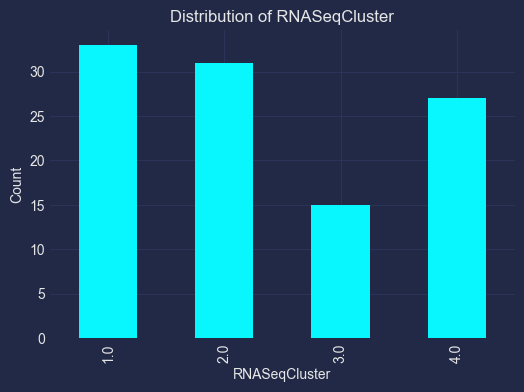

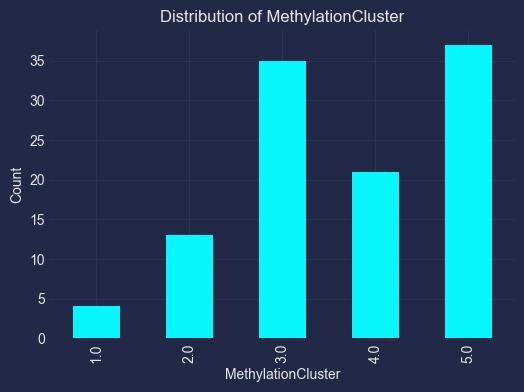

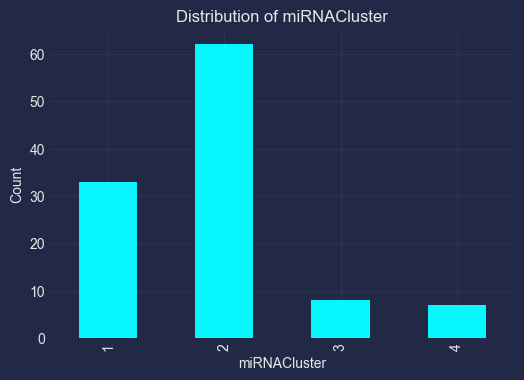

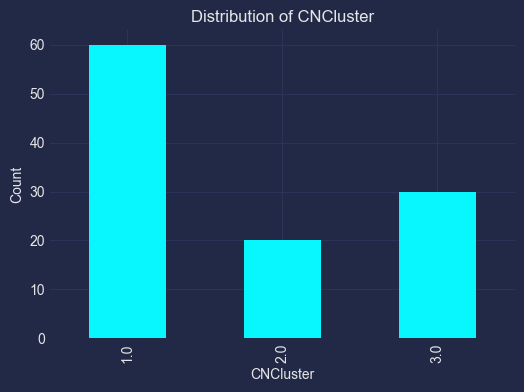

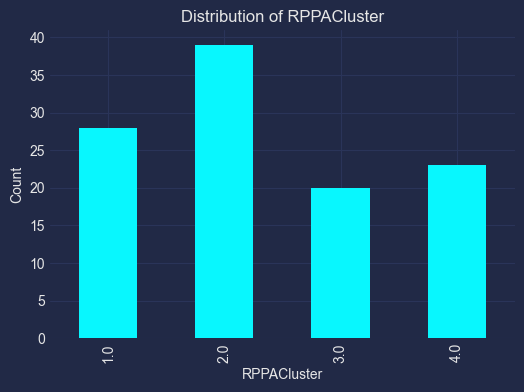

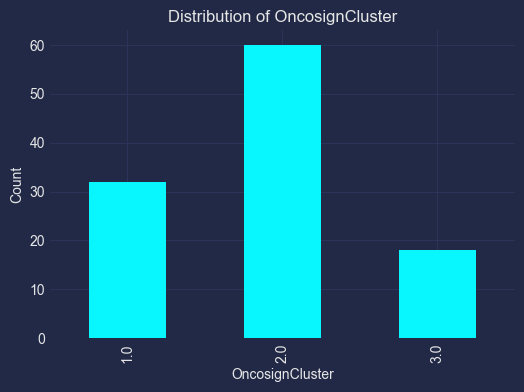

In [48]:
import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use("cyberpunk")

cluster_cols = ["RNASeqCluster", "MethylationCluster", "miRNACluster", 
                "CNCluster", "RPPACluster", "OncosignCluster"]

for col in cluster_cols:
    plt.figure(figsize=(6,4))
    df_meta_filled[col].value_counts().sort_index().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    mplcyberpunk.add_glow_effects()
    plt.show()


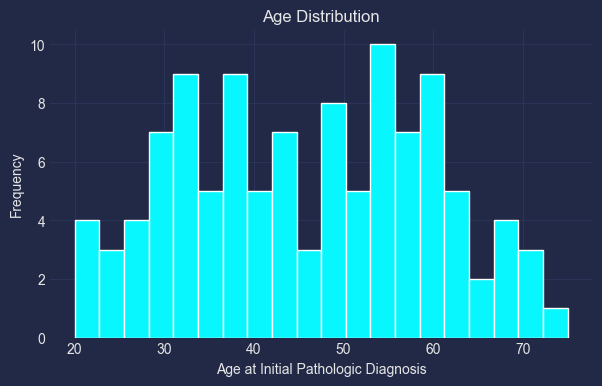

In [49]:
plt.figure(figsize=(7,4))
df_meta_filled["age_at_initial_pathologic"].hist(bins=20, edgecolor="white")
plt.title("Age Distribution")
plt.xlabel("Age at Initial Pathologic Diagnosis")
plt.ylabel("Frequency")
mplcyberpunk.add_glow_effects()
plt.show()


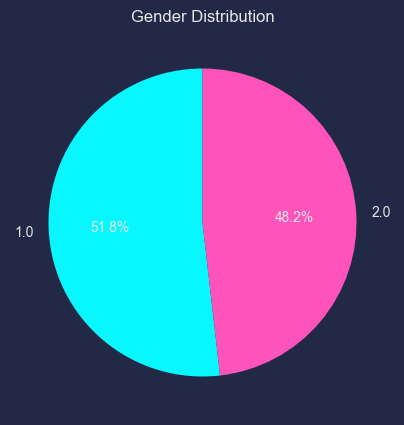

In [50]:
plt.figure(figsize=(5,5))
df_meta_filled["gender"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90)
plt.title("Gender Distribution")
plt.ylabel("")
mplcyberpunk.add_glow_effects()
plt.show()


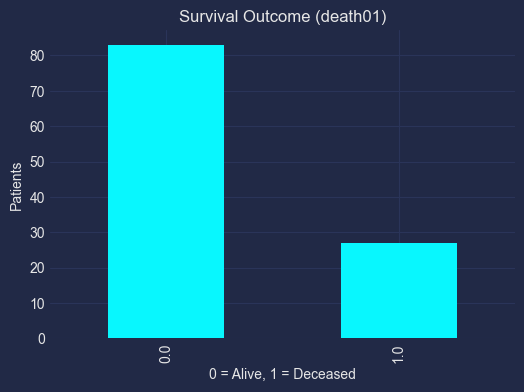

In [51]:
plt.figure(figsize=(6,4))
df_meta_filled["death01"].value_counts().plot(kind="bar")
plt.title("Survival Outcome (death01)")
plt.xlabel("0 = Alive, 1 = Deceased")
plt.ylabel("Patients")
mplcyberpunk.add_glow_effects()
plt.show()


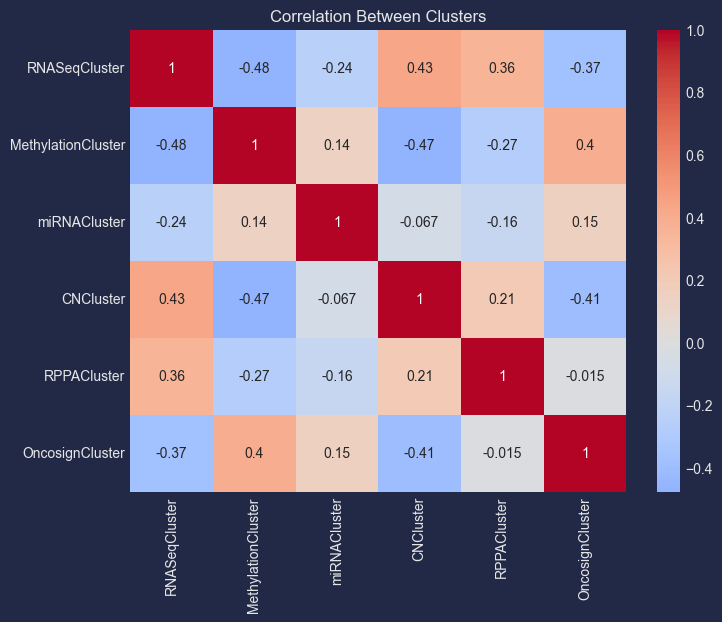

In [52]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df_meta_filled[cluster_cols].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Between Clusters")
plt.show()


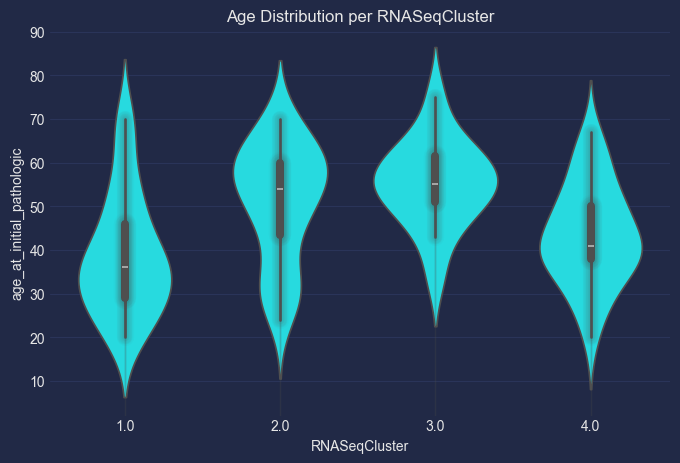

In [53]:
plt.style.use("cyberpunk")

import seaborn as sns

plt.figure(figsize=(8,5))
sns.violinplot(
    data=df_meta_filled,
    x="RNASeqCluster",
    y="age_at_initial_pathologic",
    inner="box"
)
plt.title("Age Distribution per RNASeqCluster")
mplcyberpunk.add_glow_effects()
plt.show()


In [56]:
from pathlib import Path
import numpy as np
from PIL import Image
from tqdm import tqdm

img_paths = list(Path(ROOT).rglob("*.tif"))
means, stds = [], []

for p in tqdm(img_paths):
    if "_mask" in p.stem:  # skip masks
        continue
    img = np.array(Image.open(p)).astype(np.float32) / 255.0
    means.append(img.mean())
    stds.append(img.std())

mean = np.mean(means)
std = np.mean(stds)

print("Mean:", mean)
print("Std:", std)

100%|██████████| 7858/7858 [01:21<00:00, 96.41it/s] 

Mean: 0.08757304
Std: 0.117922224


In [57]:
import torchvision.transforms as transforms

train_img_tfms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([mean], [std])  # grayscale → single channel
])


train_mask_tfms = transforms.Compose([
    transforms.ToTensor()
])


In [58]:
import torch

def mask_to_tensor(mask):
    return torch.from_numpy(np.array(mask, dtype=np.int64))

In [59]:
train_mask_tfms = mask_to_tensor

In [60]:
from pathlib import Path

all_pairs = []

for folder in ROOT.iterdir():
    if folder.is_dir():
        for img_path in folder.glob("*.tif"):
            if img_path.stem.endswith("_mask"): # skip masks
                continue
            mask_path = folder / f"{img_path.stem}_mask.tif"
            if mask_path.exists():
                all_pairs.append((img_path, mask_path))

print(f"Total image–mask pairs found: {len(all_pairs)}")


Total image–mask pairs found: 3929


In [61]:
patient_folders = [f for f in ROOT.iterdir() if f.is_dir()]

In [63]:
folder_stats = []

for folder in patient_folders:
    files = list(folder.glob("*.tif"))
    total_files = len(files)
    
    images = {f.stem for f in files if not f.stem.endswith("_mask")}
    masks = {f.stem.replace("_mask", "") for f in files if f.stem.endswith("_mask")}
    
    pairs = images & masks
    
    folder_stats.append({
        "folder": folder.name,
        "total_files": total_files,
        "pairs": len(pairs)
    })


In [64]:
import pandas as pd
df_stats = pd.DataFrame(folder_stats)

print(df_stats.head(10))  
print("\nOverall totals:")
print("Total files:", df_stats["total_files"].sum())
print("Total pairs:", df_stats["pairs"].sum())

                  folder  total_files  pairs
0  TCGA_CS_4941_19960909           46     23
1  TCGA_CS_4942_19970222           40     20
2  TCGA_CS_4943_20000902           40     20
3  TCGA_CS_4944_20010208           40     20
4  TCGA_CS_5393_19990606           40     20
5  TCGA_CS_5395_19981004           40     20
6  TCGA_CS_5396_20010302           48     24
7  TCGA_CS_5397_20010315           44     22
8  TCGA_CS_6186_20000601           50     25
9  TCGA_CS_6188_20010812           48     24

Overall totals:
Total files: 7858
Total pairs: 3929


Split data

In [65]:
from sklearn.model_selection import train_test_split


In [66]:
# collect patient IDs (folders)
all_folders = [f for f in ROOT.iterdir() if f.is_dir()]

In [68]:
# load metadata
df_meta = df_meta_filled

In [69]:
# Extract patient IDs from metadata (align with folder names)
df_meta["PatientID"] = df_meta["Patient"]

In [71]:
# link metadata to folders
folder_names = [f.name for f in all_folders]
df_meta = df_meta[df_meta["PatientID"].isin(folder_names)]

In [72]:
#  define tumor vs non-tumor based on masks
def has_tumor(folder):
    masks = list(Path(folder).glob("*_mask.tif"))
    for m in masks:
        arr = np.array(Image.open(m))
        if arr.sum() > 0:
            return True
    return False

In [73]:
df_meta["HasTumor"] = df_meta["PatientID"].apply(lambda pid: has_tumor(ROOT / pid))

In [77]:
# Show first 10 folder names
print("Sample folder names:", folder_names[:10])

Sample folder names: ['TCGA_CS_4941_19960909', 'TCGA_CS_4942_19970222', 'TCGA_CS_4943_20000902', 'TCGA_CS_4944_20010208', 'TCGA_CS_5393_19990606', 'TCGA_CS_5395_19981004', 'TCGA_CS_5396_20010302', 'TCGA_CS_5397_20010315', 'TCGA_CS_6186_20000601', 'TCGA_CS_6188_20010812']


In [82]:
# Show first 10 Patient IDs from CSV
print("Sample Patient IDs:", df_meta_filled["Patient"].head(10).tolist())

Sample Patient IDs: ['TCGA_CS_4941', 'TCGA_CS_4942', 'TCGA_CS_4943', 'TCGA_CS_4944', 'TCGA_CS_5393', 'TCGA_CS_5395', 'TCGA_CS_5396', 'TCGA_CS_5397', 'TCGA_CS_6186', 'TCGA_CS_6188']


In [83]:
from pathlib import Path

ROOT = Path("../../data/downloads/segmentation/brain_mri/")

folder_names = [f.name for f in ROOT.iterdir() if f.is_dir()]
folder_id_map = {f: "_".join(f.split("_")[:3]) for f in folder_names}

valid_folders = {f: pid for f, pid in folder_id_map.items() if pid in df_meta_filled["Patient"].values}

print(f"Total valid folders matched with CSV: {len(valid_folders)}")
print(list(valid_folders.items())[:10])  # preview matches

Total valid folders matched with CSV: 110
[('TCGA_CS_4941_19960909', 'TCGA_CS_4941'), ('TCGA_CS_4942_19970222', 'TCGA_CS_4942'), ('TCGA_CS_4943_20000902', 'TCGA_CS_4943'), ('TCGA_CS_4944_20010208', 'TCGA_CS_4944'), ('TCGA_CS_5393_19990606', 'TCGA_CS_5393'), ('TCGA_CS_5395_19981004', 'TCGA_CS_5395'), ('TCGA_CS_5396_20010302', 'TCGA_CS_5396'), ('TCGA_CS_5397_20010315', 'TCGA_CS_5397'), ('TCGA_CS_6186_20000601', 'TCGA_CS_6186'), ('TCGA_CS_6188_20010812', 'TCGA_CS_6188')]


In [84]:
import shutil
import random
from pathlib import Path
from sklearn.model_selection import train_test_split

In [85]:
ROOT = Path("../../data/downloads/segmentation/brain_mri/")

# Destination for processed splits
DEST = Path("../../data/processed/segmentation/brain_mri")
(DEST / "train").mkdir(parents=True, exist_ok=True)
(DEST / "val").mkdir(parents=True, exist_ok=True)
(DEST / "test").mkdir(parents=True, exist_ok=True)

In [86]:
import numpy as np
from PIL import Image
from pathlib import Path

# Example: pick one folder
folder = ROOT / "TCGA_HT_A616_19991226"  # <-- replace with your folder

mask_files = list(folder.glob("*_mask.tif"))

print(f"Checking folder: {folder.name}, total masks: {len(mask_files)}")

has_tumor = False
for mfile in mask_files:
    mask = np.array(Image.open(mfile))
    if mask.sum() > 0:   # non-empty mask
        print(f"  Tumor detected in: {mfile.name}")
        has_tumor = True
    else:
        print(f"  Empty mask (no tumor): {mfile.name}")

print("\nFolder label →", "Has Tumor" if has_tumor else "No Tumor")


Checking folder: TCGA_HT_A616_19991226, total masks: 28
  Empty mask (no tumor): TCGA_HT_A616_19991226_10_mask.tif
  Empty mask (no tumor): TCGA_HT_A616_19991226_11_mask.tif
  Tumor detected in: TCGA_HT_A616_19991226_12_mask.tif
  Tumor detected in: TCGA_HT_A616_19991226_13_mask.tif
  Tumor detected in: TCGA_HT_A616_19991226_14_mask.tif
  Tumor detected in: TCGA_HT_A616_19991226_15_mask.tif
  Tumor detected in: TCGA_HT_A616_19991226_16_mask.tif
  Tumor detected in: TCGA_HT_A616_19991226_17_mask.tif
  Tumor detected in: TCGA_HT_A616_19991226_18_mask.tif
  Tumor detected in: TCGA_HT_A616_19991226_19_mask.tif
  Empty mask (no tumor): TCGA_HT_A616_19991226_1_mask.tif
  Tumor detected in: TCGA_HT_A616_19991226_20_mask.tif
  Tumor detected in: TCGA_HT_A616_19991226_21_mask.tif
  Tumor detected in: TCGA_HT_A616_19991226_22_mask.tif
  Empty mask (no tumor): TCGA_HT_A616_19991226_23_mask.tif
  Empty mask (no tumor): TCGA_HT_A616_19991226_24_mask.tif
  Empty mask (no tumor): TCGA_HT_A616_1999122

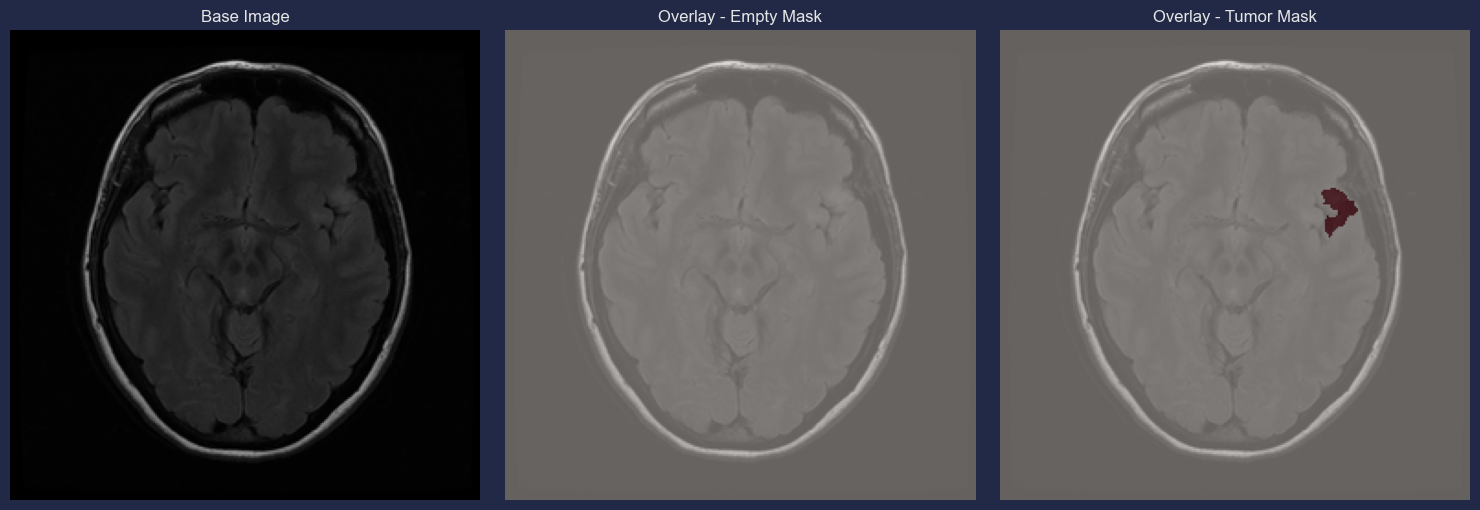

In [87]:
import matplotlib.pyplot as plt

# Paths to the image and masks
base_img_path = folder / "TCGA_HT_A616_19991226_12.tif"   # one that has tumor
mask_with_tumor = folder / "TCGA_HT_A616_19991226_12_mask.tif"
mask_empty = folder / "TCGA_HT_A616_19991226_11_mask.tif"

# Load image + masks
base_img = np.array(Image.open(base_img_path))
mask1 = np.array(Image.open(mask_empty))
mask2 = np.array(Image.open(mask_with_tumor))

# Plot side by side
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(base_img, cmap="gray")
axs[0].set_title("Base Image")
axs[0].axis("off")

axs[1].imshow(base_img, cmap="gray")
axs[1].imshow(mask1, cmap="Reds", alpha=0.4)
axs[1].set_title("Overlay - Empty Mask")
axs[1].axis("off")

axs[2].imshow(base_img, cmap="gray")
axs[2].imshow(mask2, cmap="Reds", alpha=0.4)
axs[2].set_title("Overlay - Tumor Mask")
axs[2].axis("off")

plt.tight_layout()
plt.show()


🧠 Understanding the Dataset Structure

Each folder in the dataset corresponds to a single patient scan session (e.g., TCGA_HT_A616_19991226). Inside each folder, you will find multiple .tif files that represent 2D slices of the patient’s brain MRI. Together, these slices form the full 3D brain volume.

For each slice, there are two files:

The image slice (e.g., ..._12.tif) – a grayscale MRI scan showing the anatomy of the brain at a specific depth.

The corresponding mask (e.g., ..._12_mask.tif) – an annotation of the same slice where tumor regions are highlighted.

Not all slices will contain tumor regions:

Some slices show no tumor → their masks are completely black (all zeros).

Other slices intersect the tumor → their masks highlight the tumor area in red (non-zero values).

This variation exists because the tumor is a 3D structure: it only appears in certain cross-sections depending on its size and location. By including both tumor-containing and empty slices, the dataset teaches the model:

To detect and segment tumors when they are present.

To ignore normal tissue when no tumor is visible.

This makes the dataset realistic and valuable for training robust tumor segmentation models.

In [88]:
folder_stats = []
for folder in ROOT.iterdir():
    if folder.is_dir():
        tifs = list(folder.glob("*.tif"))
        total_files = len(tifs)
        pairs = len([f for f in tifs if not f.stem.endswith("_mask")])
        folder_stats.append({"folder": folder.name, "total_files": total_files, "pairs": pairs})


In [89]:
df_stats = pd.DataFrame(folder_stats)
df_stats = df_stats.sort_values(by="total_files", ascending=False).reset_index(drop=True)

In [90]:
print(df_stats.to_string(index=False))

               folder  total_files  pairs
TCGA_HT_A61A_20000127          176     88
TCGA_HT_A61B_19991127          176     88
TCGA_HT_7881_19981015          160     80
TCGA_FG_A60K_20040224          146     73
TCGA_DU_5872_19950223          142     71
TCGA_DU_6405_19851005          120     60
TCGA_DU_7014_19860618          120     60
TCGA_FG_8189_20030516          120     60
TCGA_FG_6690_20020226          120     60
TCGA_DU_6407_19860514          116     58
TCGA_DU_7010_19860307          116     58
TCGA_DU_6400_19830518          114     57
TCGA_DU_6408_19860521          112     56
TCGA_DU_A5TT_19980318          112     56
TCGA_DU_6404_19850629          106     53
TCGA_DU_6399_19830416          106     53
TCGA_DU_7008_19830723          104     52
TCGA_FG_5962_20000626          102     51
TCGA_DU_6401_19831001          102     51
TCGA_FG_7637_20000922          102     51
TCGA_FG_A4MT_20020212          100     50
TCGA_DU_7013_19860523           98     49
TCGA_FG_6691_20020405           96

In [93]:
from sklearn.model_selection import train_test_split
import pandas as pd
from pathlib import Path
import numpy as np

In [94]:
# --- detect if a folder has at least one tumor mask ---
def folder_has_tumor(folder_path: Path) -> int:
    mask_files = list(folder_path.glob("*_mask.tif"))
    for m in mask_files:
        arr = np.array(Image.open(m))
        if arr.sum() > 0:   # non-empty mask
            return 1
    return 0

In [95]:
# --- assign HasTumor to each folder ---
ROOT = Path("../../data/downloads/segmentation/brain_mri/")
df_stats = pd.DataFrame(folder_stats)  # from your earlier step
df_stats["HasTumor"] = df_stats["folder"].apply(
    lambda f: folder_has_tumor(ROOT / f)
)


In [96]:
# ---  stratified split by folders ---
train_folders, testval_folders = train_test_split(
    df_stats["folder"],
    test_size=0.30,  # 30% for val+test
    stratify=df_stats["HasTumor"],
    random_state=42
)

In [97]:
val_folders, test_folders = train_test_split(
    testval_folders,
    test_size=0.50, 
    stratify=df_stats.set_index("folder").loc[testval_folders, "HasTumor"],
    random_state=42
)

In [98]:
df_stats["split"] = "unused"
df_stats.loc[df_stats["folder"].isin(train_folders), "split"] = "train"
df_stats.loc[df_stats["folder"].isin(val_folders), "split"] = "val"
df_stats.loc[df_stats["folder"].isin(test_folders), "split"] = "test"

In [99]:
print(df_stats["split"].value_counts())
print("\nTumor balance per split:")
print(df_stats.groupby(["split", "HasTumor"])["folder"].count())

split
train    77
test     17
val      16
Name: count, dtype: int64

Tumor balance per split:
split  HasTumor
test   1           17
train  1           77
val    1           16
Name: folder, dtype: int64


In [100]:
import shutil
from pathlib import Path

SRC_ROOT = Path("../../data/downloads/segmentation/brain_mri/")
DST_ROOT = Path("../../data/processed/segmentation/brain_mri/")

for split in ["train", "val", "test"]:
    (DST_ROOT / split).mkdir(parents=True, exist_ok=True)

for _, row in df_stats.iterrows():
    folder = row["folder"]
    split = row["split"]
    src = SRC_ROOT / folder
    dst = DST_ROOT / split / folder
    
    if not dst.exists():
        shutil.copytree(src, dst)
        print(f"Copied {folder} → {split}")


Copied TCGA_CS_4941_19960909 → train
Copied TCGA_CS_4942_19970222 → val
Copied TCGA_CS_4943_20000902 → val
Copied TCGA_CS_4944_20010208 → train
Copied TCGA_CS_5393_19990606 → train
Copied TCGA_CS_5395_19981004 → train
Copied TCGA_CS_5396_20010302 → train
Copied TCGA_CS_5397_20010315 → train
Copied TCGA_CS_6186_20000601 → train
Copied TCGA_CS_6188_20010812 → train
Copied TCGA_CS_6290_20000917 → train
Copied TCGA_CS_6665_20010817 → train
Copied TCGA_CS_6666_20011109 → train
Copied TCGA_CS_6667_20011105 → train
Copied TCGA_CS_6668_20011025 → val
Copied TCGA_CS_6669_20020102 → train
Copied TCGA_DU_5849_19950405 → train
Copied TCGA_DU_5851_19950428 → train
Copied TCGA_DU_5852_19950709 → train
Copied TCGA_DU_5853_19950823 → train
Copied TCGA_DU_5854_19951104 → test
Copied TCGA_DU_5855_19951217 → test
Copied TCGA_DU_5871_19941206 → train
Copied TCGA_DU_5872_19950223 → val
Copied TCGA_DU_5874_19950510 → train
Copied TCGA_DU_6399_19830416 → train
Copied TCGA_DU_6400_19830518 → train
Copied TCGA

In [101]:
import numpy as np
from PIL import Image

def folder_has_tumor(folder_path: Path) -> int:
    """Return 1 if at least one mask in folder has tumor pixels, else 0."""
    for mask_file in folder_path.glob("*_mask.tif"):
        mask = np.array(Image.open(mask_file))
        if mask.sum() > 0:  # non-empty mask = tumor present
            return 1
    return 0

In [102]:
# Add tumor presence info
df_stats["HasTumor"] = df_stats["folder"].apply(lambda f: folder_has_tumor(ROOT / f))

# Count by split
tumor_balance = df_stats.groupby(["split", "HasTumor"])["folder"].count().unstack(fill_value=0)

print("Tumor balance across splits:")
print(tumor_balance)

# Optional: also count total pairs per split & tumor group
tumor_pairs = df_stats.groupby(["split", "HasTumor"])["pairs"].sum().unstack(fill_value=0)
print("\nPairs distribution (slices with/without tumor) across splits:")
print(tumor_pairs)


Tumor balance across splits:
HasTumor   1
split       
test      17
train     77
val       16

Pairs distribution (slices with/without tumor) across splits:
HasTumor     1
split         
test       523
train     2760
val        646


### 🔀 Dataset Splitting Strategy

For training robust tumor segmentation models, it is crucial to split the dataset carefully to avoid information leakage and maintain balanced distributions.  
Here’s the logic behind our splitting process:

1. **Split by Patient (not by slice)**  
   - Each folder corresponds to a unique patient case.  
   - To prevent data leakage, we ensured that all slices from a given patient stay together in one split (train, validation, or test).  
   - This avoids the model “seeing” slices from the same brain in both training and testing, which would artificially inflate performance.

2. **Stratified by Tumor Presence**   
   - To avoid imbalance (e.g., all “no-tumor” cases ending up in test), we stratified the split so that each of **train, validation, and test sets** contains both tumor-positive and tumor-negative patients.

3. **Split Proportions**  
   - We used a **70% / 15% / 15% split** at the patient-folder level.  
   - This ensures a large training set while reserving enough data for fair validation and testing.

4. **Balance Check**  
   - After splitting, we verified the distribution of tumor-positive vs. tumor-negative patients in each set.  
   - Example summary:
     - **Train:** 77 tumor-positive patients (~2700 tumor slices)  
     - **Validation:** 16 tumor-positive patients (~646 tumor slices)  
     - **Test:** 17 tumor-positive patients (~523 tumor slices)  
   - This confirms that all splits contain both classes, ensuring reliable training and evaluation.

✅ With this strategy, our model learns from diverse patients, generalizes better, and is evaluated fairly.
